In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!unzip /content/drive/MyDrive/ColabNotebooks/data.zip # Décompresser votre base de données à partir du Drive
#!unzip /content/drive/MyDrive/IA_Dec_2022/data.zip # Décompresser votre base de données à partir du Drive

In [3]:
import os
print('total Validation COVID-19 images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [4]:
train_dir = '/home/maliki/master/cyber m1/machine learning/data/TRAIN'
validation_dir = '/home/maliki/master/cyber m1/machine learning/data/VAL'

In [5]:
from tensorflow.keras.models import Sequential
from keras import layers # n'est plus utile

from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
#Dense ==> fully connected
#Conv2D ==> convolution
#Flatten ==> transfert entre Couche de convolution et fullyconnected
#MaxPooling2D ==> pooling (Max ou average)

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# des commandes utiles pour des callbacks (avoir un retour pendant l'execution)

# socle sur le quel on va installer les différentes couches de l'architecture
model = Sequential()

model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(227, 227, 3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))


# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
model.add(layers.Dense(2, activation='softmax'))

2024-02-18 21:30:39.858684: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 21:30:39.888518: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 21:30:39.888544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 21:30:39.889264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 21:30:39.894054: I tensorflow/core/platform/cpu_feature_guar

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [7]:
from keras.preprocessing.image import ImageDataGenerator
# pour générer des images synthétique dans la RAM pour l'apprentissage (non disponibles sur le disque)

train_datagen = ImageDataGenerator(rescale=1./255, # normalisation
                                   rotation_range=10, # 10 est le degré de rotation
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True, # flip est comme un effet miroir
                                   fill_mode='nearest') # nearest est la méthode d'interpolation

Val_datagen = ImageDataGenerator(rescale=1./255) # juste la normalisation

train_generator = train_datagen.flow_from_directory(  #application du générateur sur la base initiale
    train_dir,
    target_size=(227, 227),
    batch_size=2, # mise à jour toutes les deux images
    #class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=2,
    # class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25


2024-02-18 21:30:44.525386: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-18 21:30:45.846671: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f520c00cd20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 21:30:45.846689: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-18 21:30:45.850925: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708288245.923542   13448 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 9s 132ms/step - loss: 2.8046 - accuracy: 0.3846 - val_loss: 0.8186 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 1s 54ms/step - loss: 0.7069 - accuracy: 0.5385 - val_loss: 0.6731 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 1s 53ms/step - loss: 0.7017 - accuracy: 0.4615 - val_loss: 0.6633 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 1s 53ms/step - loss: 0.6020 - accuracy: 0.6410 - val_loss: 0.5380 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 1s 53ms/step - loss: 0.8435 - accuracy: 0.7436 - val_loss: 0.6172 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 1s 53ms/step - loss: 0.5582 - accuracy: 0.6923 - val_loss: 0.5536 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 7/25
20/20 [==============================] - 1s 53ms/step - loss: 0.9774 - accu

In [9]:
model_sgd = Sequential()
model_sgd.add(Conv2D(256, (3, 3), activation='relu', input_shape=(227, 227, 3)))
model_sgd.add(Conv2D(128, (3, 3), activation='relu'))
model_sgd.add(MaxPooling2D((2, 2)))
model_sgd.add(Conv2D(64, (3, 3), activation='relu')) #on a ajouter des layers
model_sgd.add(MaxPooling2D((2, 2)))
model_sgd.add(Flatten())
model_sgd.add(Dropout(0.25))
model_sgd.add(Dense(512, activation='relu'))
model_sgd.add(Dense(256, activation='relu'))
model_sgd.add(Dense(2, activation='softmax'))  # Classification binaire
model_sgd.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['mae'])#On à changé adam en sgd (gradient descent), binary_crossentropy au lieu de categorical_crossentropy et metrics avec mae (Erreur absolue moyenne (Mean Absolute Error)) et on à augmenté l'accuracy de 75% à 86-96% et rarement en dessous de 70% mais toujour aleatoire
history_sgd = model_sgd.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/50
20/20 [==============================] - 2s 58ms/step - loss: 0.6982 - mae: 0.4922 - val_loss: 0.6877 - val_mae: 0.4945 - lr: 0.0100
Epoch 2/50
20/20 [==============================] - 1s 49ms/step - loss: 0.6992 - mae: 0.5045 - val_loss: 0.6832 - val_mae: 0.4899 - lr: 0.0100
Epoch 3/50
20/20 [==============================] - 1s 48ms/step - loss: 0.6896 - mae: 0.4960 - val_loss: 0.6781 - val_mae: 0.4846 - lr: 0.0100
Epoch 4/50
20/20 [==============================] - 1s 49ms/step - loss: 0.6940 - mae: 0.4997 - val_loss: 0.6733 - val_mae: 0.4792 - lr: 0.0100
Epoch 5/50
20/20 [==============================] - 1s 48ms/step - loss: 0.6774 - mae: 0.4795 - val_loss: 0.6465 - val_mae: 0.4510 - lr: 0.0100
Epoch 6/50
20/20 [==============================] - 1s 49ms/step - loss: 0.6720 - mae: 0.4523 - val_loss: 0.6233 - val_mae: 0.4239 - lr: 0.0100
Epoch 7/50
20/20 [==============================] - 1s 49ms/step - loss: 0.6424 - mae: 0.4264 - val_loss: 0.6157 - val_mae: 0.4071 - lr:

In [10]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


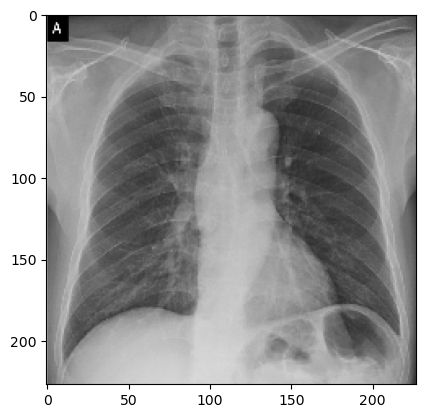

1/1 [==============================] - 0s 61ms/step
adam score :  [[0.5306598 0.4693402]]
sgd score :  [[0.7767617  0.22323829]]


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/home/maliki/master/cyber m1/machine learning/data/TEST/COVID-19.jpeg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
score_sgd= model_sgd.predict(x)
print("adam score : ", score)
print("sgd score : ", score_sgd)

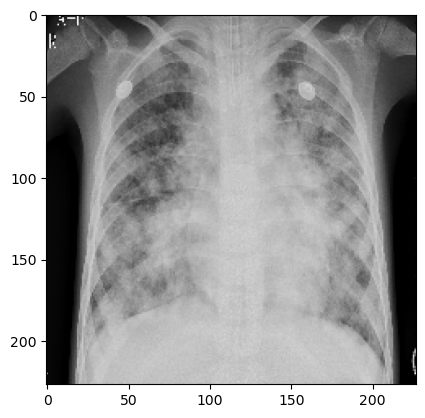

1/1 [==============================] - 0s 14ms/step
adam score :  [[0.5306598 0.4693402]]
sgd score :  [[0.12929595 0.870704  ]]


In [12]:
img_path='/home/maliki/master/cyber m1/machine learning/data/TEST/Healthy.jpeg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score_sgd= model_sgd.predict(x)
print("adam score : ", score)
print("sgd score : ", score_sgd)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_moy=0 
precision_moy=0 
recall_moy=0
f_score_moy=0
TP=0
TN=0
FP=0
FN=0
for i in range(1,20):
    print("tour numero : ",i)
    # Prédictions sur les données de validation
    y_pred = model.predict(validation_generator)
    y_true = validation_generator.classes

    # Convertir les probabilités en classe prédite (binarisation)
    y_pred_binary = np.argmax(y_pred, axis=1)

    # Calcul de l'exactitude
    accuracy = accuracy_score(y_true, y_pred_binary)
    print(f'Accuracy: {accuracy:.2f}') # Pourcentage des prédictions effectuées par notre modèle correctes.
    accuracy_moy=accuracy_moy+accuracy
    # Calcul de la précision
    precision = precision_score(y_true, y_pred_binary) # Pourcentage lorsque notre modèle prédit qu'une image appartient à la classe "Positive" (par exemple, COVID-19)
    print(f'Precision: {precision:.2f}')
    precision_moy=precision+precision_moy
    # Calcul du rappel
    recall = recall_score(y_true, y_pred_binary) # Pourcentage signifie que notre modèle est capable de détecter correctement toutes les instances de la classe "Positive" (par exemple, COVID-19) présentes dans les données.
    print(f'Recall: {recall:.2f}')
    recall_moy=recall+recall_moy
    # Calcul du F-score
    f_score = f1_score(y_true, y_pred_binary) # Mesure combinée de la précision et du rappel
    print(f'F-score: {f_score:.2f}')
    f_score_moy=f_score+f_score_moy
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred_binary) # La matrice de confusion révèle le nombre de prédictions correctes et incorrectes, avec les vrais négatifs (TN) en haut à gauche, les faux positifs (FP) en haut à droite, les faux négatifs (FN) en bas à gauche et les vrais positifs (TP) en bas à droite.
    print('Confusion Matrix:')
    print(f'Vrai positif (TP) = {conf_matrix[1, 1]}, Vrai négatif (TN) = {conf_matrix[0, 0]}')
    print(f'Faux négatif (FN) = {conf_matrix[1, 0]}, Faux positif (FP) = {conf_matrix[0, 1]}')
    TP=conf_matrix[1, 1]+TP
    TN=TN+conf_matrix[0, 0]
    FP=FP+conf_matrix[0, 1]
    FN=FN+conf_matrix[1, 0]
print("--------------------------------------------------------------------------")
print("Accuracy moyenne adam : ",accuracy_moy/20 ,"| Precision moyenne adam: ",precision_moy/20 ,"| Recall moyen adam", recall_moy/20,"| Fscore moyen adam: ",f_score_moy/20)

print(f"TP (True Positive) moyen adam : {TP/20}", f"| TN (True Negative) moyen adam : {TN/20}", f"| FP (False Positive) moyen adam : {FP/20}",f"| FN (False Negative) moyen adam : {FN/20}")

tour numero :  1
5/5 [==============================] - 0s 31ms/step
Accuracy: 0.50
Precision: 0.50
Recall: 0.20
F-score: 0.29
Confusion Matrix:
Vrai positif (TP) = 1, Vrai négatif (TN) = 4
Faux négatif (FN) = 4, Faux positif (FP) = 1
tour numero :  2
5/5 [==============================] - 0s 20ms/step
Accuracy: 0.50
Precision: 0.50
Recall: 0.20
F-score: 0.29
Confusion Matrix:
Vrai positif (TP) = 1, Vrai négatif (TN) = 4
Faux négatif (FN) = 4, Faux positif (FP) = 1
tour numero :  3
5/5 [==============================] - 0s 33ms/step
Accuracy: 0.70
Precision: 1.00
Recall: 0.40
F-score: 0.57
Confusion Matrix:
Vrai positif (TP) = 2, Vrai négatif (TN) = 5
Faux négatif (FN) = 3, Faux positif (FP) = 0
tour numero :  4
5/5 [==============================] - 0s 33ms/step
Accuracy: 0.30
Precision: 0.00
Recall: 0.00
F-score: 0.00
Confusion Matrix:
Vrai positif (TP) = 0, Vrai négatif (TN) = 3
Faux négatif (FN) = 5, Faux positif (FP) = 2
tour numero :  5
5/5 [==============================] - 0s 3

In [14]:
accuracy_moy=0 
precision_moy=0 
recall_moy=0
f_score_moy=0
TP=0
TN=0
FP=0
FN=0
for i in range(1,20):
    print("tour numero : ",i)
    # Prédictions sur les données de validation
    y_pred = model_sgd.predict(validation_generator)
    y_true = validation_generator.classes

    # Convertir les probabilités en classe prédite (binarisation)
    y_pred_binary = np.argmax(y_pred, axis=1)

    # Calcul de l'exactitude
    accuracy = accuracy_score(y_true, y_pred_binary)
    print(f'Accuracy: {accuracy:.2f}') # Pourcentage des prédictions effectuées par notre modèle correctes.
    accuracy_moy=accuracy_moy+accuracy
    # Calcul de la précision
    precision = precision_score(y_true, y_pred_binary) # Pourcentage lorsque notre modèle prédit qu'une image appartient à la classe "Positive" (par exemple, COVID-19)
    print(f'Precision: {precision:.2f}')
    precision_moy=precision+precision_moy
    # Calcul du rappel
    recall = recall_score(y_true, y_pred_binary) # Pourcentage signifie que notre modèle est capable de détecter correctement toutes les instances de la classe "Positive" (par exemple, COVID-19) présentes dans les données.
    print(f'Recall: {recall:.2f}')
    recall_moy=recall+recall_moy
    # Calcul du F-score
    f_score = f1_score(y_true, y_pred_binary) # Mesure combinée de la précision et du rappel
    print(f'F-score: {f_score:.2f}')
    f_score_moy=f_score+f_score_moy
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred_binary) # La matrice de confusion révèle le nombre de prédictions correctes et incorrectes, avec les vrais négatifs (TN) en haut à gauche, les faux positifs (FP) en haut à droite, les faux négatifs (FN) en bas à gauche et les vrais positifs (TP) en bas à droite.
    print('Confusion Matrix:')
    print(f'Vrai positif (TP) = {conf_matrix[1, 1]}, Vrai négatif (TN) = {conf_matrix[0, 0]}')
    print(f'Faux négatif (FN) = {conf_matrix[1, 0]}, Faux positif (FP) = {conf_matrix[0, 1]}')
    TP=conf_matrix[1, 1]+TP
    TN=TN+conf_matrix[0, 0]
    FP=FP+conf_matrix[0, 1]
    FN=FN+conf_matrix[1, 0]
print("--------------------------------------------------------------------------")

print("Accuracy moyenne sgd : ",accuracy_moy/20 ,"| Precision moyenne sgd: ",precision_moy/20 ,"| Recall moyen sgd", recall_moy/20,"| Fscore moyen f_score : ",f_score_moy/20)
print(f"TP (True Positive) moyen sgd : {TP/20}",f"| TN (True Negative) moyen sgd : {TN/20}" , f"| FP (False Positive) moyen sgd : {FP/20}",f"| FN (False Negative) moyen sgd : {FN/20}")


tour numero :  1
5/5 [==============================] - 0s 37ms/step
Accuracy: 0.30
Precision: 0.25
Recall: 0.20
F-score: 0.22
Confusion Matrix:
Vrai positif (TP) = 1, Vrai négatif (TN) = 2
Faux négatif (FN) = 4, Faux positif (FP) = 3
tour numero :  2
5/5 [==============================] - 0s 32ms/step
Accuracy: 0.50
Precision: 0.50
Recall: 0.40
F-score: 0.44
Confusion Matrix:
Vrai positif (TP) = 2, Vrai négatif (TN) = 3
Faux négatif (FN) = 3, Faux positif (FP) = 2
tour numero :  3
5/5 [==============================] - 0s 29ms/step
Accuracy: 0.30
Precision: 0.25
Recall: 0.20
F-score: 0.22
Confusion Matrix:
Vrai positif (TP) = 1, Vrai négatif (TN) = 2
Faux négatif (FN) = 4, Faux positif (FP) = 3
tour numero :  4
5/5 [==============================] - 0s 33ms/step
Accuracy: 0.70
Precision: 0.75
Recall: 0.60
F-score: 0.67
Confusion Matrix:
Vrai positif (TP) = 3, Vrai négatif (TN) = 4
Faux négatif (FN) = 2, Faux positif (FP) = 1
tour numero :  5
5/5 [==============================] - 0s 3

**Conclusion : on à comparer (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) avec (optimizer="sgd", loss='binary_crossentropy', metrics=['mae']) 

Et en moyenne le modele sgd est meilleurs dans tout les domaines (accuracy , true positive , true negative , precision etc ....) donc le modele sgd est mieux**

In [15]:
#Conclusion : on à comparer (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) avec (optimizer="sgd", loss='binary_crossentropy', metrics=['mae']) 

#Et en moyenne le modele adam est meilleurs dans tout les domaines (accuracy , true positive , true negative , precision etc ....) donc le modele adam est mieux